# Exploring Thomas Fire Using California Fire Perimeter data

**Author**: Kat Le

**Github Repository**: https://github.com/katleyq/eds220-hwk4

### About this notebook

The purpose of this notebook is to obtain the offical 2017 Thomas Fire perimeter polygon from the California Fire Perimeter dataset. The resulting spatial object is saved to the data folder of this repository to be used for future analysis in `hwk4-task2-false-color-LE.ipynb`.

### Highlights
This notebook will demonstrate the following:
- Exploration of CALFIRE fire perimeters data 
- Filter fire perimeter dataset for area of interest
- Saving output of analysis as a spatial data file


### Data Access
**California Fire Perimeter Data**: This data was retrieved from US governement's data catalogue on November 18, 2024. Original Source: [California Fire Perimeter Data](https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436)
- **Description**: This dataset contains geospatial information for all fire perimeters within California from 1898 to 2023. This dataset is maintained by the California Department of Forestry and Fire Protection (CAL FIRE). The purpose of this dataset is to track the frequency and extent of fire boundaries across time. It also serves as an important resource for researchers and policymakers.


### Import libraries and load data

In [1]:
import os
import pandas as pd # To work with data frames
import geopandas as gpd # To maniplate spatial data frames
from shapely.geometry import box  # To create polygon bounding box
import matplotlib.pyplot as plt # To plot spatial data
from matplotlib_scalebar.scalebar import ScaleBar # for map scalebar
import matplotlib.patches as mpatches # for map legend
from matplotlib.offsetbox import AnchoredText # for map compass

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

# Set options to display all columns when viewing
pd.set_option("display.max.columns", None)

### Read in California Fire Perimeter spatial data

In [2]:
# Create path to repository data folder
data_folder_fp = os.path.join(#'/',
                              #'Users',
                              #'katherine', 
                              #'MEDS',
                              #'EDS-220',
                              #'eds220-hwk4',
                              'data')

# Load California Fire Perimeter shapefile
df = gpd.read_file(f"{data_folder_fp}/California_Fire_Perimeters/California_Fire_Perimeters.shp")

### Preliminary Fire Perimeter Data Exploration
As with any data object, it is important to explore your data to see if it is what you expected. In this section, we'll look at the head, date range, shape, and CRS of the dataframe. We'll also want to see if this data is projected or geographic. 

In [3]:
# Display head of data frame
df.head(3)

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2023,CA,CDF,SKU,WHITWORTH,00004808,2023-06-17,2023-06-17,5,1,1,5.72913,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},None,None,2020,"POLYGON ((-13682443.000 5091132.739, -13682445..."
1,2023,CA,LRA,BTU,KAISER,00010225,2023-06-02,2023-06-02,5,1,1,13.60240,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},None,None,2020,"POLYGON ((-13576727.142 4841226.161, -13576726..."
2,2023,CA,CDF,AEU,JACKSON,00017640,2023-07-01,2023-07-02,2,1,1,27.81450,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},None,None,2020,"POLYGON ((-13459243.000 4621236.000, -13458968..."


In [15]:
# Print the date range of the ALARM_DATE 
print(f"Date range: {df['ALARM_DATE'].min()} to {df['ALARM_DATE'].max()}")

Date range: 1898-04-01 to 2023-12-22


In [4]:
# Display shape
df.shape

(22261, 19)

In [5]:
# Display crs of df
df.crs

<Projected CRS: PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GE ...>
Name: WGS_1984_Web_Mercator_Auxiliary_Sphere
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
print(f"Is this data projected? {df.crs.is_projected}")
print(f"Is this data geographic? {df.crs.is_geographic}")

Is this data projected? True
Is this data geographic? False


**Results**

From this prelimary data exploration, we find that this dataset contains polygons of all California fires from 1898 to 2023. There have been 22,261 fires that are recorded in this dataset. The CRS of this dataset is WGS 84, and it is projected - not geographic.

### Thomas Fire Boundary

Since the dataset above contains all California Fires, we'll want to subset for just the Thomas Fire. There have been multiple fires that have been named Thomas, so we'll want to specifically choose the one that occurred in 2017. Then we'll plot it just to see the Thomas Fire perimeter.

In [7]:
# Filter df for observation where fire name is "THOMAS" and year is 2017 since there are other fires named Thomas
thomas_fire = df.loc[(df['FIRE_NAME'] == 'THOMAS') & (df['YEAR_'] == 2017)]

Text(0.5, 0, 'Figure 1: This is a polygon of the 2017 Thomas Fire perimeter.')

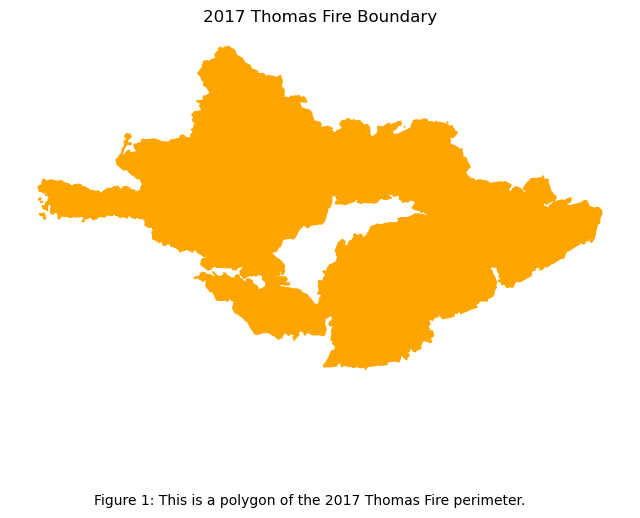

In [16]:
# Initialize plot
fig, ax = plt.subplots(figsize=(8, 6))

# Turn off the axes
ax.axis('off')

# Plot the GeoDataFrame with the desired styling
thomas_fire.plot(ax=ax, color='orange', edgecolor='orange')

# Add title
ax.set_title('2017 Thomas Fire Boundary')

# Add figure description
plt.figtext(0.5, 0, "Figure 1: This is a polygon of the 2017 Thomas Fire perimeter.", wrap=True, horizontalalignment='center', fontsize=10)


In [10]:
# Save file to data folder
thomas_fire.to_file('data/thomas_fire.shp')

**Reasoning for output file**

I decided to save the Thomas Fire Boundary as a shapefile for consistency since I downloaded the original California Fire Perimeter data as a shapefile. 